In [1]:
import pickle
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%run -i 0_functions.py

In [5]:
all_subsets_hvg = []
division = 5
for i in [1, 2, 3]:
    for j in range(division):
        dataset = read_with_pc(f"data/rep{i}_mono_subset{j}_hvg.h5ad")
        all_subsets_hvg.append(dataset)

for i in [1, 2, 3]:
    for j in range(division):
        dataset = read_with_pc(f"data/rep{i}_ery_subset{j}_hvg.h5ad")
        all_subsets_hvg.append(dataset)

In [6]:
import dynchro
import numpy as np
from tqdm.notebook import tqdm


def run_dynchro(datasets, diag, unique = False):
    distances = [[0 for i in range(len(all_subsets_hvg))] for j in range(len(all_subsets_hvg))]
    distances_normalised = [[0 for i in range(len(all_subsets_hvg))] for j in range(len(all_subsets_hvg))]

    for i1 in tqdm(range(len(datasets))):
        d1 = datasets[i1]
        d1 = d1[np.argsort(d1.obs["pseudotime"])]

        for j1 in tqdm(range(i1+1, len(datasets)), leave = False):
            d2 = datasets[j1]
            d2 = d2[np.argsort(d2.obs["pseudotime"])]

            if unique:
                # select unique var ids
                obs_ids = list(set(d1.obs_names) ^ set(d2.obs_names))
                d1_mask = d1.obs_names.isin(obs_ids) 
                d2_mask = d2.obs_names.isin(obs_ids)

                d1 = d1[d1_mask, :]
                d2 = d2[d2_mask, :]
                
            reference = d1
            query = d2
            dtw_key = "dtw"
            pseudotime_key = "pseudotime"
            mode = "copy"

            common_genes = np.intersect1d(d1.var_names, d2.var_names)
            reference = reference[:, common_genes]
            query = query[:, common_genes]

            reference, query = dynchro.tl.dtw(reference, query, dtw_key=dtw_key, pseudotime_key=pseudotime_key, mode=mode)
            reference, query = dynchro.tl.traceback(reference, query, dtw_key = dtw_key, mode = mode)

            cost = reference.obsm[f"{dtw_key}_cost"]
            distance = reference.uns[f"{dtw_key}_distance"]

            norm_distance = distance / (cost.shape[0] * cost.shape[1])

            distances[i1][j1] = distance
            distances_normalised[i1][j1] = norm_distance

            distances[j1][i1] = distance
            distances_normalised[j1][i1] = norm_distance

    return distances, distances_normalised

In [7]:
results_no_dup_hvg_dist, results_no_dup_hvg_dist_norm = run_dynchro(all_subsets_hvg, 2, unique = True)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/28 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/27 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/26 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/25 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/24 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/23 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/22 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/21 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/20 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/19 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/18 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/17 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/16 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/15 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/14 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/13 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/12 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/11 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/10 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/9 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/8 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/7 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/6 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/5 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/4 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/3 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/2 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T


  0%|          | 0/1 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T


0it [00:00, ?it/s]

In [16]:
pickle.dump(results_no_dup_hvg_dist, open("data/results_no_dup_hvg_dist.pkl", "wb"))
pickle.dump(results_no_dup_hvg_dist_norm, open("data/results_no_dup_hvg_dist_norm.pkl", "wb"))

In [8]:
with open("data/results_no_dup_hvg_dist_norm.pkl", "rb") as f:
    results_no_dup_hvg_dist_norm = pickle.load(f)

In [9]:
all_labels = ["rep1_sub1_mono", "rep1_sub2_mono", "rep1_sub3_mono", "rep1_sub4_mono", "rep1_sub5_mono", "rep2_sub1_mono", "rep2_sub2_mono", "rep2_sub3_mono", "rep2_sub4_mono", "rep2_sub5_mono", "rep3_sub1_mono", "rep3_sub2_mono", "rep3_sub3_mono", "rep3_sub4_mono", "rep3_sub5_mono", "rep1_sub1_ery", "rep1_sub2_ery", "rep1_sub3_ery", "rep1_sub4_ery", "rep1_sub5_ery", "rep2_sub1_ery", "rep2_sub2_ery", "rep2_sub3_ery", "rep2_sub4_ery", "rep2_sub5_ery", "rep3_sub1_ery", "rep3_sub2_ery", "rep3_sub3_ery", "rep3_sub4_ery", "rep3_sub5_ery"]

In [11]:
def visualise_norms(dist_norm, labels, vmins = None, vmaxs = None):
    # mirror dist_norm_path and dist_norm_orig around the diagonal
    for i in range(len(dist_norm)):
        for j in range(i+1, len(dist_norm)):
            # dist_norm_orig[j][i] = dist_norm_orig[i][j]
            # dist[j][i] = dist[i][j]
            dist_norm[j][i] = dist_norm[i][j]

    if vmins is None:
        vmins = min([min(row) for row in dist_norm])
    if vmaxs is None:
        vmaxs = max([max(row) for row in dist_norm])

    fig, axs = plt.subplots(1, 1, figsize = (5, 5))
    sns.heatmap(dist_norm, xticklabels = labels, yticklabels = labels, ax = axs, vmin = vmins, vmax = vmaxs)
    axs.set_title("Distance")



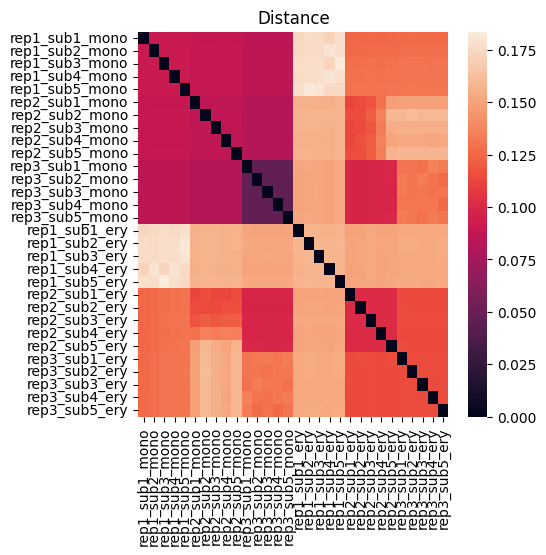

In [12]:
visualise_norms(results_no_dup_hvg_dist_norm, all_labels)


In [13]:
def cluster(dist_norm, labels, linkage, vmins = None, vmaxs = None):
    # dist = [[res[0].dist() if not isinstance(res, int) else 0 for res in res1] for res1 in results]
    # dist_norm = [[res[0].dist_norm() if not isinstance(res, int) else 0 for res in res1] for res1 in results]
    # dist_norm_orig = [[res[0].dist() / (sum(len(x) for x in res[0].path1().values())) if not isinstance(res, int) else 0 for res in res1] for res1 in results]

    # mirror dist_norm_path and dist_norm_orig around the diagonal
    # for i in range(len(dist_norm)):
    #     for j in range(i+1, len(dist_norm)):
    #         dist_norm_orig[j][i] = dist_norm_orig[i][j]
    #         dist[j][i] = dist[i][j]
    #         dist_norm[j][i] = dist_norm[i][j]

    if vmins is None:
        vmins = min([min(row) for row in dist_norm])
    if vmaxs is None:
        vmaxs = max([max(row) for row in dist_norm])

    c1 = sns.clustermap(dist_norm, xticklabels = labels, yticklabels = labels, vmin = vmins, vmax = vmaxs, method = linkage)
    c1.fig.set_size_inches(4, 4)

/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


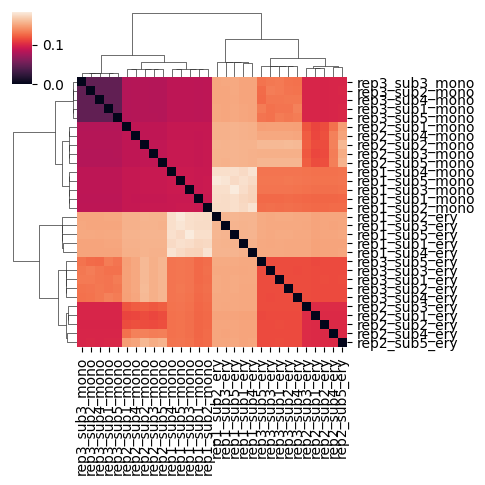

In [15]:
vmins = min([min(row) for row in results_no_dup_hvg_dist_norm])
vmaxs = max([max(row) for row in results_no_dup_hvg_dist_norm])

c1 = sns.clustermap(results_no_dup_hvg_dist_norm, xticklabels = all_labels, yticklabels = all_labels, vmin = vmins, vmax = vmaxs, method = "ward")
c1.fig.set_size_inches(4, 4)

In [16]:
import pandas as pd

lineages = ["Monocytic"] * 15 + ["Erythroid"] * 15
replicates = ["Rep1"] * 5 + ["Rep2"] * 5 + ["Rep3"] * 5 + ["Rep1"] * 5 + ["Rep2"] * 5 + ["Rep3"] * 5
subsampling = ["Sub1", "Sub2", "Sub3", "Sub4", "Sub5"] * 6

labeling = pd.DataFrame({
    "Lineage": lineages,
    "Replicate": replicates
}, index=all_labels)

In [17]:
colors = plt.cm.get_cmap("Set2").colors + (plt.cm.get_cmap("Set3").colors[9],)
labeling_colors = pd.DataFrame({
    "Replicate": replicates,
        "Lineage": lineages
}, index=labeling.index)

labeling_colors["Lineage"] = labeling["Lineage"].map({"Monocytic": colors[4], "Erythroid": colors[5]})
labeling_colors["Replicate"] = labeling["Replicate"].map({"Rep1": colors[6], "Rep2": colors[7], "Rep3": colors[8]})

/tmp/ipykernel_272938/1554093393.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("Set2").colors + (plt.cm.get_cmap("Set3").colors[9],)


In [18]:
def get_color_legend(color_map):
    handles = [
        plt.Line2D(
                [0], [0], marker='s', markerfacecolor=c, color = "k", 
                markersize = 7.5, lw = 0
            ) for c in color_map.values()
        ]
    labels = list(color_map.keys())
    return handles, labels

/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/tmp/ipykernel_272938/1249813183.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=plt.cm.get_cmap("YlOrBr")),


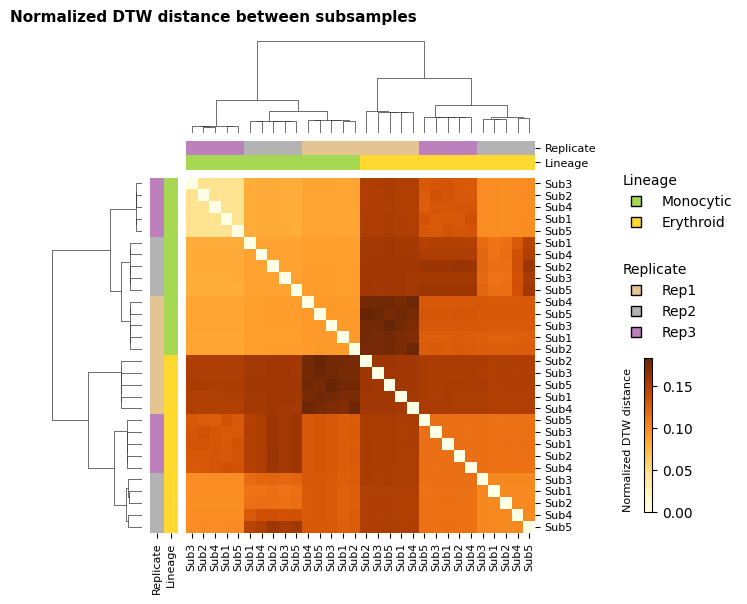

In [19]:
# fig, axes = plt.subplots(1, 3, figsize = (8, 6), width_ratios=[10, 1, 1])
import matplotlib

dist_norm = results_no_dup_hvg_dist_norm
maxval = max([max(row) for row in dist_norm])

data = pd.DataFrame(dist_norm, index=all_labels, columns=all_labels)

labels = all_labels
p = sns.clustermap(
    data,
    xticklabels = subsampling,
    yticklabels = subsampling,
    method = "ward",
    col_colors=labeling_colors,
    row_colors=labeling_colors,
    cbar_pos = None,
    # cbar_kws = {"location": "right", "label": "Normalized DTW distance"},
    dendrogram_ratio=(.2, .2),
    cmap="YlOrBr",
    figsize=(7.5, 6)
    # axes = axes[0],
    # linewidths = 0.01,
    
)
p.gs.update(left=0.05, right=0.7)
# set font size of tick labels
plt.setp(p.ax_heatmap.get_xticklabels(), rotation=90, fontsize=8)
plt.setp(p.ax_heatmap.get_yticklabels(), rotation=0, fontsize=8)

# set font size of row color labels
p.ax_row_colors.set_xticklabels(p.ax_row_colors.get_xticklabels(), fontsize=8)
p.ax_col_colors.set_yticklabels(p.ax_col_colors.get_yticklabels(), fontsize=8)
# plt.setp(p.ax_col_colors.get_xticklabels(), rotation=90, fontsize=8)
# plt.setp(p.ax_row_colors.get_yticklabels(), rotation=0, fontsize=8)

gs2 = matplotlib.gridspec.GridSpec(3,1, left=0.8, height_ratios=[3,1,3])
ax2 = p.fig.add_subplot(gs2[0])
ax2.axis("off")
ax3 = p.fig.add_subplot(gs2[1])
ax3.axis("off")
ax4 = p.fig.add_subplot(gs2[2])
ax4.axis("off")

plt.subplots_adjust(hspace=0.05, wspace=0.05)
# plt.tight_layout()

handles, labels = get_color_legend({"Monocytic": colors[4], "Erythroid": colors[5]})
leg = ax2.legend(handles, labels, title="Lineage", loc="lower left", frameon=False, alignment = "left")

handles, labels = get_color_legend({"Rep1": colors[6], "Rep2": colors[7], "Rep3": colors[8]})
leg = ax3.legend(handles, labels, title="Replicate", loc="upper left", frameon=False, alignment = "left")

fig = p.fig
norm = matplotlib.colors.Normalize(vmin=0, vmax=maxval)
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom", plt.cm.get_cmap("YlOrBr").colors, N=256)
fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=plt.cm.get_cmap("YlOrBr")),
                ax=ax4, orientation='vertical', label='',
                fraction=0.75, shrink=0.75,location='right', anchor = (0.5, 0.4), ticks = [0, 0.05, 0.1, 0.15, 0.2])

ax4.text(1.5, 0.45, "Normalized DTW distance", rotation=90, va="center", ha="center", fontsize = 8)

p.fig.suptitle("Normalized DTW distance between subsamples", x = 0, y=1.02, horizontalalignment = "left", fontsize = 11, fontweight = "bold")

fig.savefig("figures/figure_5b_dtw_subsamples.pdf", bbox_inches = "tight", dpi = 300)
fig.savefig("figures/figure_5b_dtw_subsamples.png", bbox_inches = "tight", dpi = 300)
